In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper

In [2]:
#Get Current Date and 1 Year Back Date
date_today = datetime.date.today()
date_one_year_back = date_today.replace(date_today.year - 1)

date_today_string = date_today.strftime('%d-%m-%Y')
date_one_year_back_string = date_one_year_back.strftime('%d-%m-%Y')

In [3]:
#Call function to get BTC historical data for past 1 year
scraper = CmcScraper('BTC', date_one_year_back_string, date_today_string)

In [4]:
#Get dataframe
df = scraper.get_dataframe()

In [5]:
#Make date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

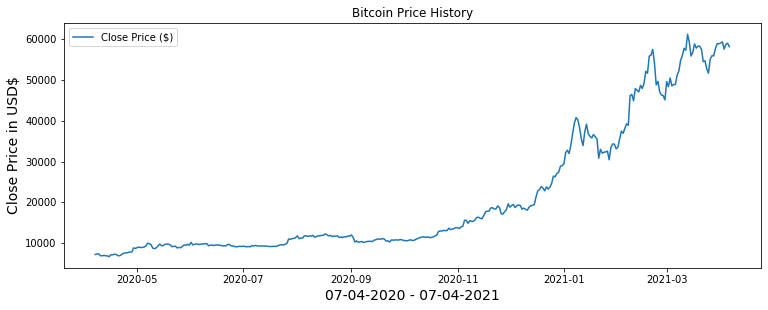

In [7]:
#Visually Show Price
plt.subplots(figsize=(12.5,4.5))
plt.plot(df.index, df['Close'], label='Close Price ($)')
plt.title('Bitcoin Price History')
plt.xlabel(f'{date_one_year_back_string} - {date_today_string}', fontsize=14)
plt.ylabel('Close Price in USD$', fontsize=14)
plt.legend()
plt.show()

## RSI (Relative Strength Index)

In [8]:
#get difference of prices from prev day
delta = df['Close'].diff(1)

#remove NaN
delta = delta.dropna()

#get ups and downs
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

#setting time period of 14 for RSI
period = 14

#average gains and losees
avg_gains = up.rolling(window=period).mean()
avg_losses = abs(down.rolling(window=period).mean())

#Calculate RS
rs = avg_gains / avg_losses

#Calculate RSI
rsi = 100.0 - (100.0 / (1.0 + rs))

In [9]:
new_df = pd.DataFrame()
new_df['Close Price'] = df['Close']
new_df['RSI'] = rsi

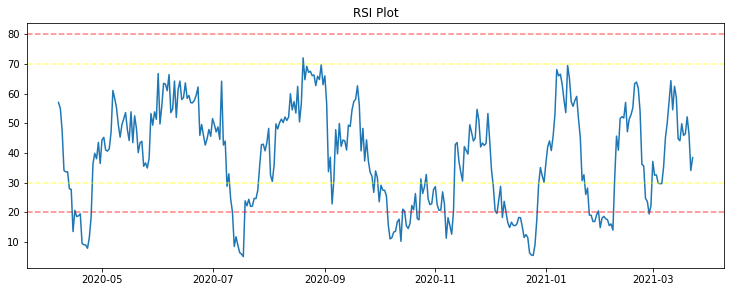

In [10]:
#Visualize RSI
plt.figure(figsize=(12.5, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(20, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='yellow')
plt.axhline(70, linestyle='--', alpha=0.5, color='yellow')
plt.axhline(80, linestyle='--', alpha=0.5, color='red')
plt.show()

In [11]:
#Generate trade signals based on RSI

flag = -1
buying_signals = []
selling_signals = []
for i in range(len(new_df)):
    if new_df['RSI'][i] <= 25:
        if flag != 1:
            buying_signals.append(new_df['Close Price'][i])
            selling_signals.append(np.nan)
            flag = 1
        else:
            buying_signals.append(np.nan)
            selling_signals.append(np.nan)
    elif new_df['RSI'][i] >= 65:
        if flag == 1:
            buying_signals.append(np.nan)
            selling_signals.append(new_df['Close Price'][i])
            flag = 0
        else:
            buying_signals.append(np.nan)
            selling_signals.append(np.nan)
    else:
        buying_signals.append(np.nan)
        selling_signals.append(np.nan)

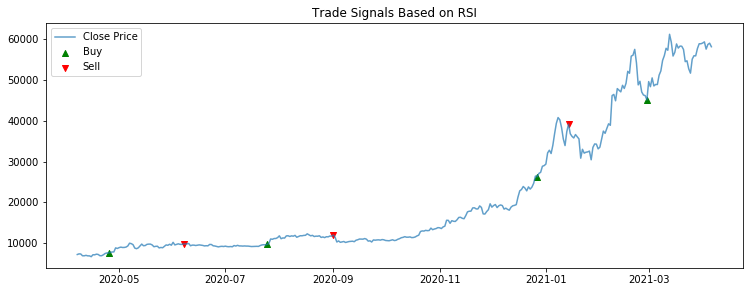

In [13]:
#Visualize Trade Signals
plt.figure(figsize=(12.5, 4.5))
plt.title('Trade Signals Based on RSI')
plt.plot(new_df['Close Price'], label='Close Price', alpha=0.7)
plt.scatter(new_df.index, buying_signals, marker='^', color='green', label='Buy')
plt.scatter(new_df.index, selling_signals, marker='v', color='red', label='Sell')
plt.legend()
plt.show()